In [1]:
import matplotlib.pyplot as plt
import ast
import json
import numpy as np
import sys
import statistics
from scipy import stats

In [11]:
#Get Accuracies
text_file = open("../hm_accuracy.txt", "r")
accurs = text_file.read().split('\n')
#accurs = accurs[:-1]
accurs = [float(x) for x in accurs]

In [12]:
#Get Gene Counts
with open("../data_scripts/genecount_gtex.json") as f:
    gene_count_dict = json.load(f)

In [13]:
datasets = list(sorted(gene_count_dict.keys()))

In [14]:
gene_counts = []
for key in datasets:
    gene_counts.append(gene_count_dict[key])

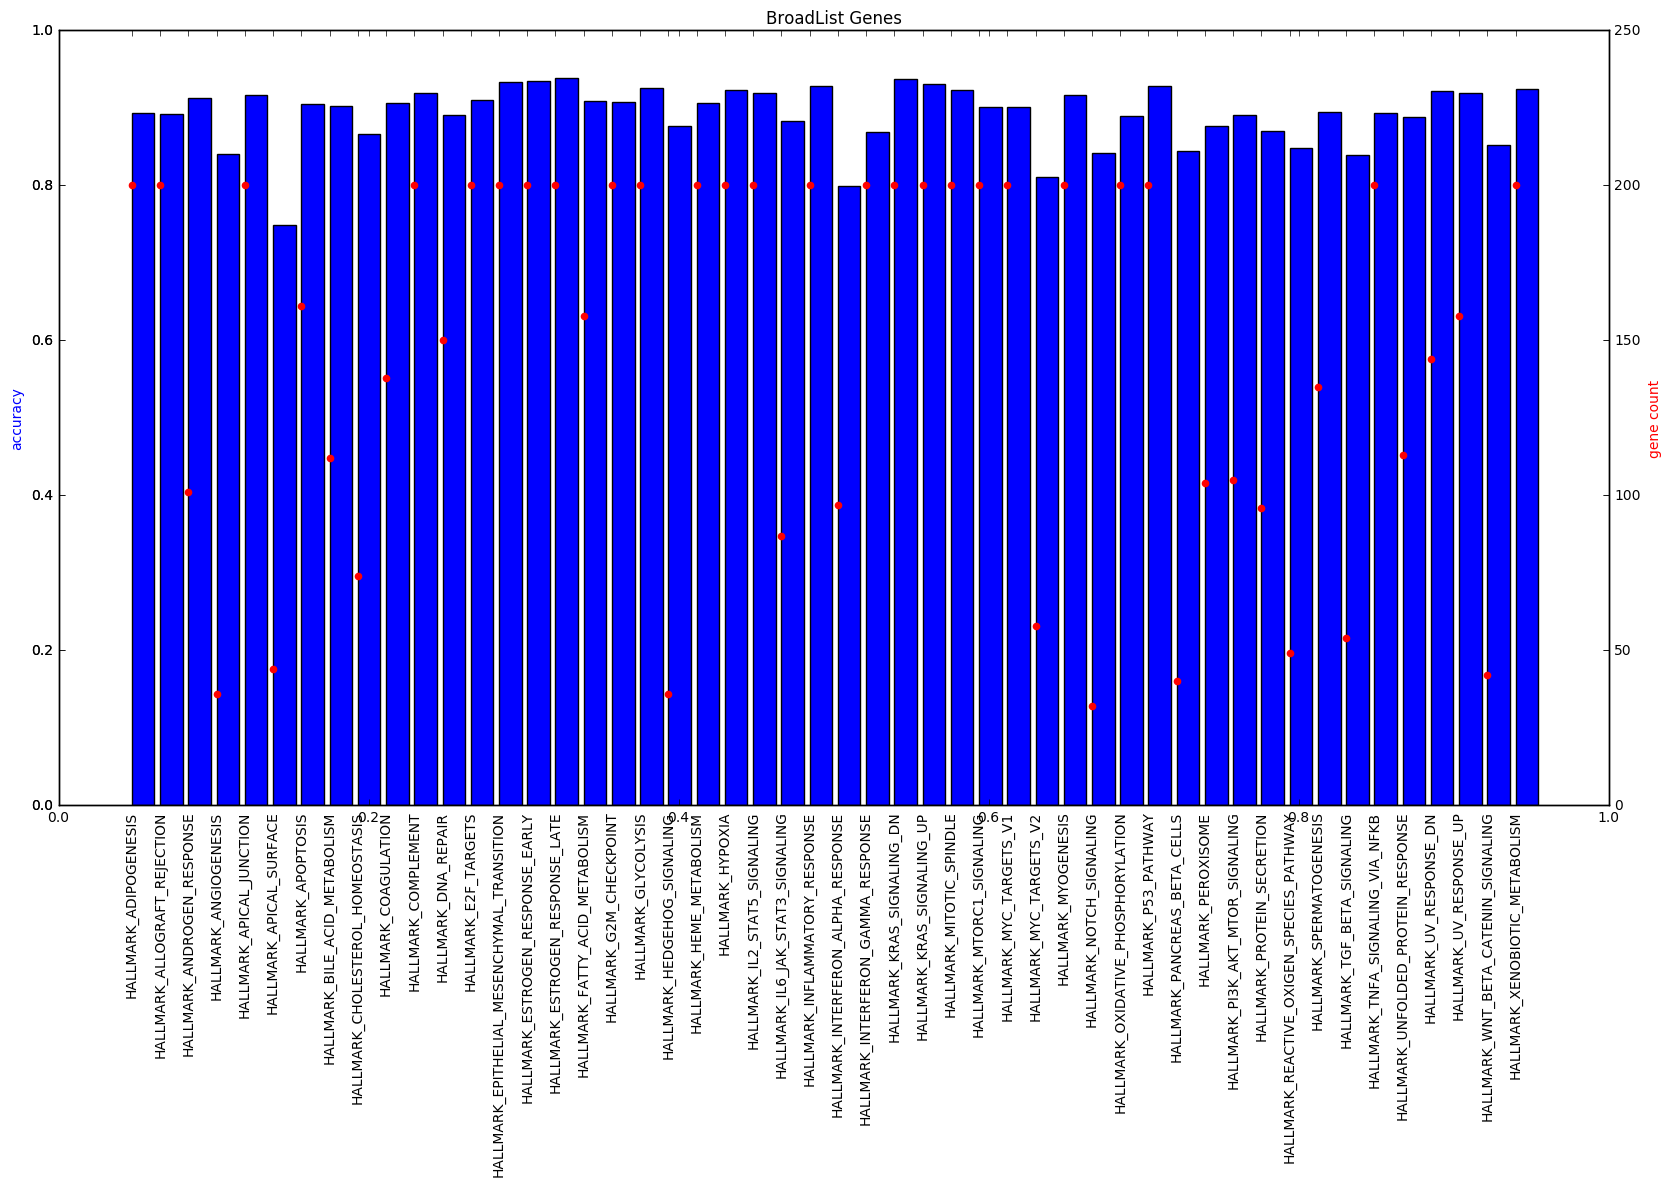

In [16]:
x = np.arange(len(datasets))

fig = plt.figure(figsize=(20,10))
plt.title("BroadList Genes") 
plt.xticks(x,datasets)
plt.xticks(rotation=90)

ax1 = fig.add_subplot(111)
ax2=fig.add_subplot(111, frame_on=False)

ax1.bar(x, accurs, color='b')
ax1.set_ylabel('accuracy',color='b')

ax2 = ax1.twinx()
ax2.scatter(x, gene_counts, color='r')
ax2.yaxis.tick_right()
ax2.xaxis.tick_bottom()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('gene count', color='r')

plt.show()

In [18]:
ran_accurs = list()
#Get Accuracies
with open("../data_scripts/random_accuracy.txt", "r") as f:
    for line in f:
        line = line.split('\t')
        line = line[1]
        ran_accurs.append(line)

ran_accurs = [x.replace('\n', '') for x in ran_accurs]
ran_accurs = [float(x) for x in ran_accurs]

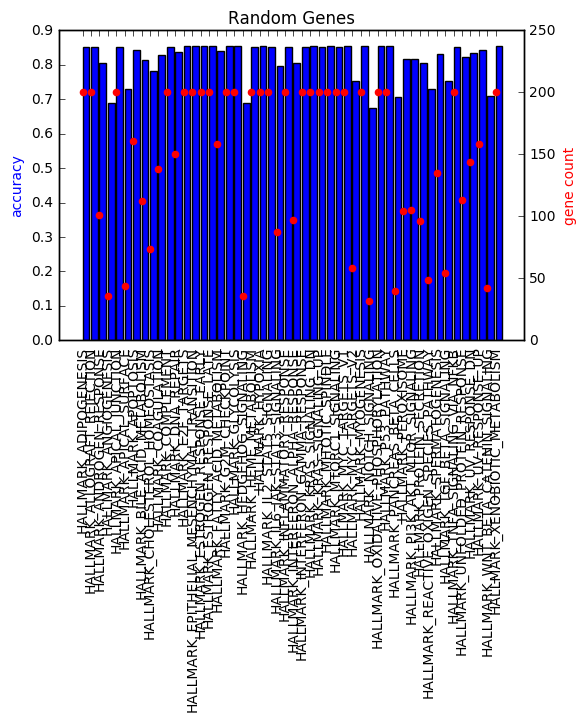

In [19]:
#plt.clf()

fig = plt.figure(figsize=(20,))
plt.title("Random Genes") 
plt.xticks(x,datasets)
plt.xticks(rotation=90)

ax3 = fig.add_subplot(111)
ax4=fig.add_subplot(111)

ax3.bar(x,ran_accurs, color='b')
ax3.set_ylabel('accuracy',color='b')

ax4 = ax3.twinx()
ax4.scatter(x, gene_counts, color='r')
ax4.yaxis.tick_right()
ax4.xaxis.tick_bottom()
ax4.yaxis.set_label_position('right') 
ax4.set_ylabel('gene count', color='r')

plt.show()

In [21]:
statistics.stdev(accurs)

0.03890525590653608

In [22]:
statistics.stdev(ran_accurs)

0.05302271610690156

In [24]:
# accuracies_100 = np.load("accuracies.npy")
# pval = np.zeros(50)

In [ ]:
accuracies_100[5]

In [ ]:
accurs[5]

In [ ]:
for run in range(100):
    for tissue in range(50):
        accuracy = accuracies_100[tissue][run]
        if accuracy > accurs[tissue]:
            #print(tissue, accuracy , accurs[tissue])
            pval[tissue] = pval[tissue] + 1
        

In [ ]:
pval

In [ ]:
for i in range(50):
    pval[i] = pval[i] / 100

In [ ]:
pval

In [ ]:
plt.bar(x_range,pval)
plt.xlabel('Datasets')
plt.xticks(x_range,datasets)
plt.xticks(rotation=90)
plt.ylabel("pval")
plt.show()

In [ ]:
genes = list()
for i in range(len(pval)):
    print(pval[i],datasets[i])
    if(pval[i] > 0):
        genes.append(datasets[i])

In [ ]:
genes

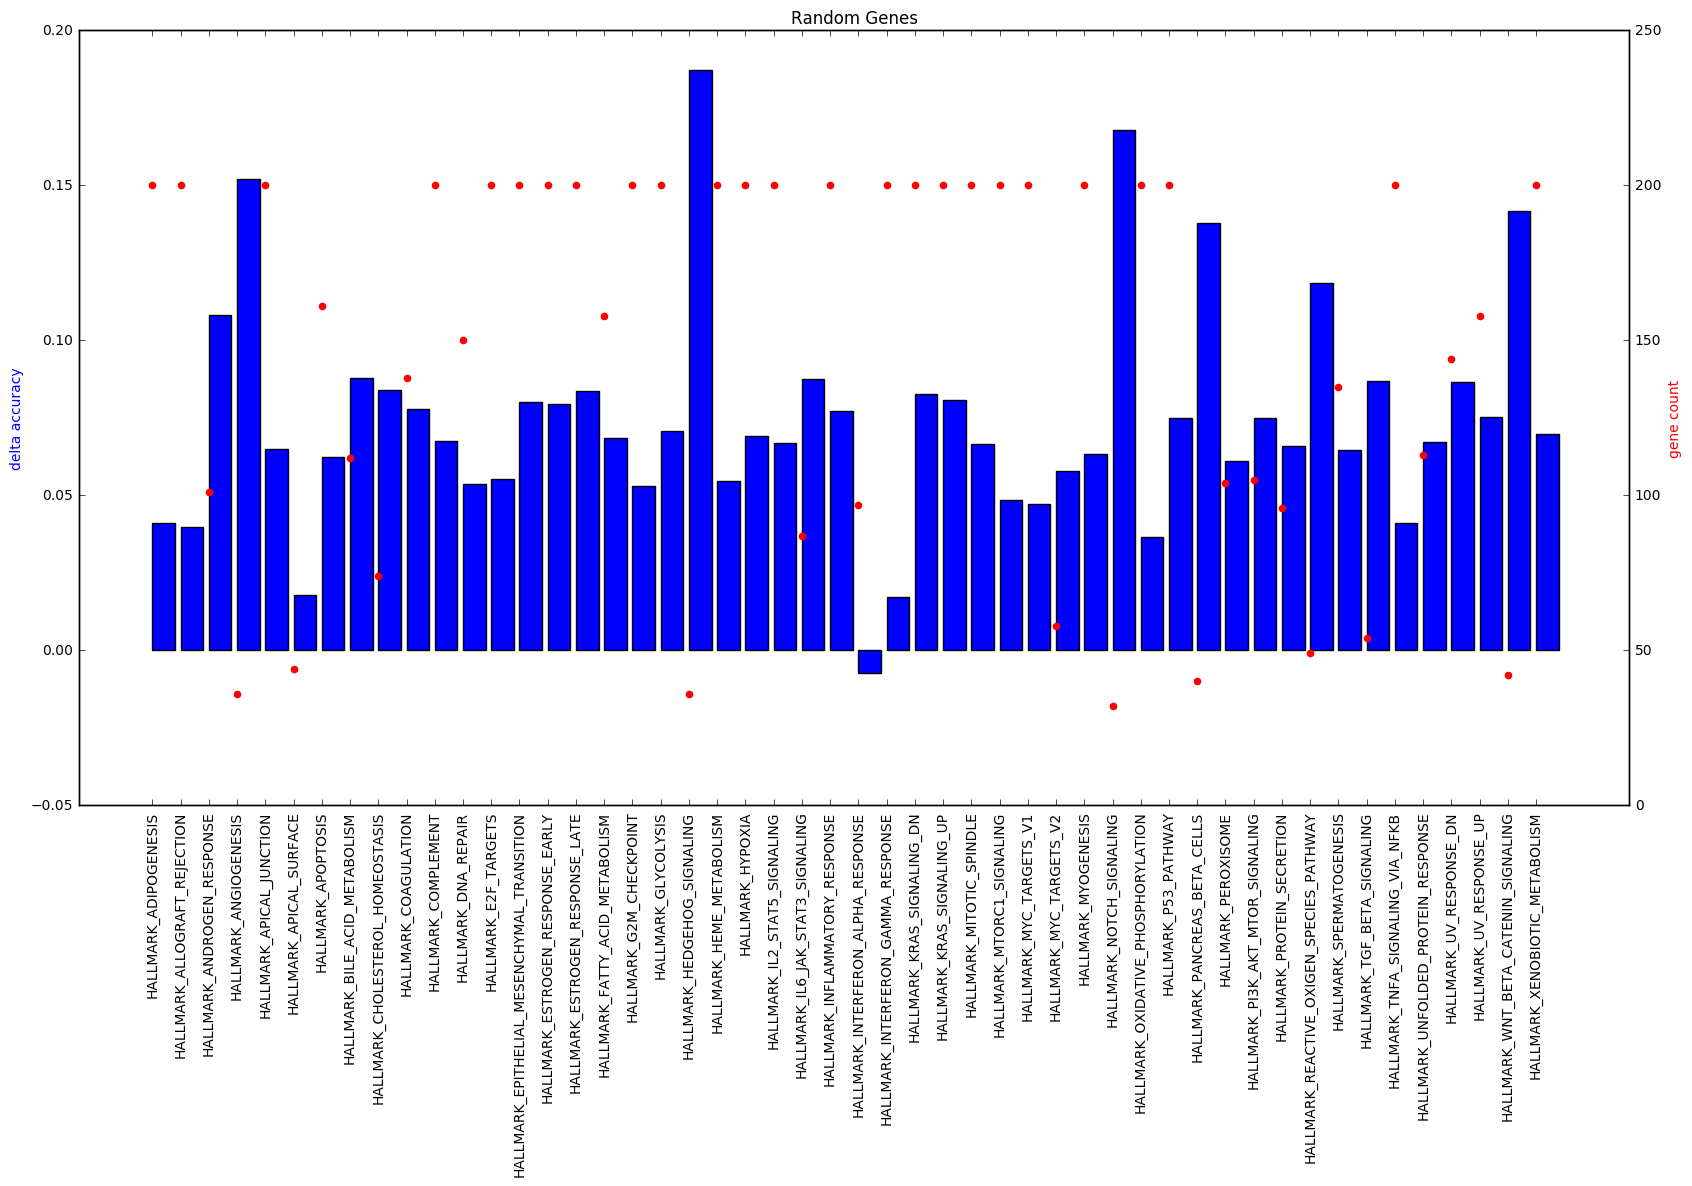

In [25]:
fig = plt.figure(figsize=(20,10))
plt.title("Random Genes") 
plt.xticks(x,datasets)
plt.xticks(rotation=90)

ax3 = fig.add_subplot(111)
ax4=fig.add_subplot(111)

ax3.bar(x,accur_diff, color='b')
ax3.set_ylabel('delta accuracy',color='b')

ax4 = ax3.twinx()
ax4.scatter(x, gene_counts, color='r')
ax4.yaxis.tick_right()
ax4.xaxis.tick_bottom()
ax4.yaxis.set_label_position('right') 
ax4.set_ylabel('gene count', color='r')

plt.show()
